# Tangent fermions: spectrum and eigestates

In this notebook we show how to use the code in tangent_fermions.py to generate and solve the generalised eigenvalue equation 3.21 in arXiv:2302.12793

In [1]:
import tangent_fermions as tf
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sla

First let us solve it for a simple system of size Nx = Ny = 101, in absence of magnetic field and with a random electrostatic potential.

Tangent fermions have poles in the edges of the Brillouin zone, so we would like to avoid them. Two possible ways to do that are to pick an odd number of unit cells with periodic boundary conditions (like we are doing in this case: Nx = Ny = 101 and kx = ky = 0) or to pick an even number of cells and antiperiodic boundary conditions.

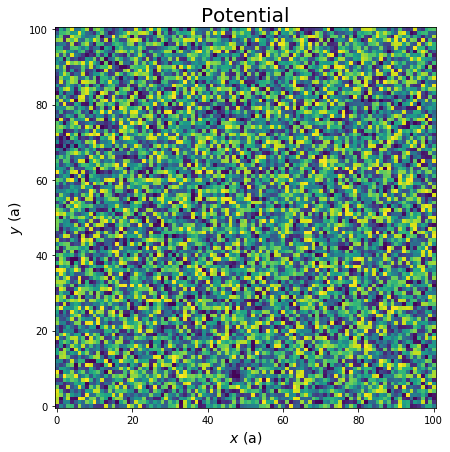

In [2]:
Nx = 101
Ny = 101

parameters = dict(
    Nx = Nx,
    Ny = Ny,
    B1 = 0, # no magnetic field
    N1 = 0, #
    d1 = 0, # These are irrelevant for B1 = 0
    N2 = 0, #
    potential = lambda x,y:0.3*np.random.rand(Ny,Nx),
    mass = lambda x,y:0*x,
    kx = 0,
    ky = 0,
    disorder = 0
)

Phi, H, P = tf.operators_real(parameters, plot_potential = True)

eigenvalues, eigenvectors = sla.eigsh(H, M=P, k = 20, tol = 0, sigma = 0, which = 'LM',return_eigenvectors = True)

The previous cell calculates 20 eigenstates and eigenvalues closest to zero energy. Let us plot one of them as an example.

Energies (hbar v/a):  [ 0.00954953  0.00954953  0.01087802  0.01087802  0.01134395  0.01134395
  0.01251081  0.01251081  0.02487524  0.02487524  0.02690958  0.02690958
 -0.02507787 -0.02507787 -0.02586617 -0.02586617 -0.03601566 -0.03601566
 -0.03750582 -0.03750582]


Text(0, 0.5, '$y$ (a)')

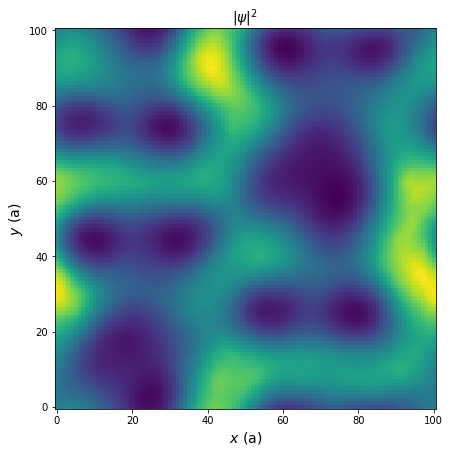

In [3]:
print('Energies (hbar v/a): ', eigenvalues)

state_to_plot = 2 #We plot the third eigenstate as an example

state = (Phi@eigenvectors[:,state_to_plot]).reshape(2,Ny,Nx)
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.imshow(np.sum(np.abs(state)**2, axis = 0),origin = 'lower')
ax.set_title(r'$|\psi|^2$', fontsize = 14)
ax.set_xlabel(r'$x$ (a)', fontsize = 14)
ax.set_ylabel(r'$y$ (a)', fontsize = 14)

Another example with magnetic field

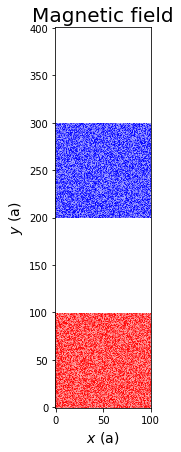

In [4]:
Nx = 101
Ny = 401

parameters = dict(
    Nx = Nx,
    Ny = Ny,
    B1 = 5*pi/Ny,
    N1 = 100,
    d1 = 100,
    N2 = 100,
    potential = lambda x,y:0.0*np.random.rand(Ny,Nx),
    mass = lambda x,y:0*x,
    kx = 0,
    ky = 0,
    disorder = 5*pi/Ny
)

Phi, H, P = tf.operators_real(parameters, plot_mag_field = True)

eigenvalues, eigenvectors = sla.eigsh(H, M=P, k = 10, tol = 0, sigma = 0, which = 'LM',return_eigenvectors = True)

Energies (hbar v/a):  [-2.00214436e-08  2.00214436e-08 -5.70289801e-08  5.70289801e-08
  9.28638621e-08 -9.28638621e-08  1.48116191e-07 -1.48116191e-07
  2.06612129e-07 -2.06612129e-07]


Text(0, 0.5, '$y$ (a)')

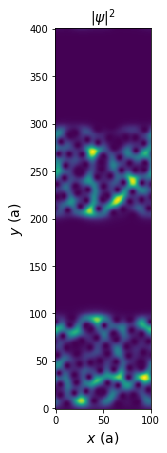

In [5]:
print('Energies (hbar v/a): ', eigenvalues)

state_to_plot = 0 #Let us plot the first eigenstate

state = (Phi@eigenvectors[:,state_to_plot]).reshape(2,Ny,Nx)
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.imshow(np.sum(np.abs(state)**2, axis = 0),origin = 'lower')
ax.set_title(r'$|\psi|^2$', fontsize = 14)
ax.set_xlabel(r'$x$ (a)', fontsize = 14)
ax.set_ylabel(r'$y$ (a)', fontsize = 14)

We can also plot band structures

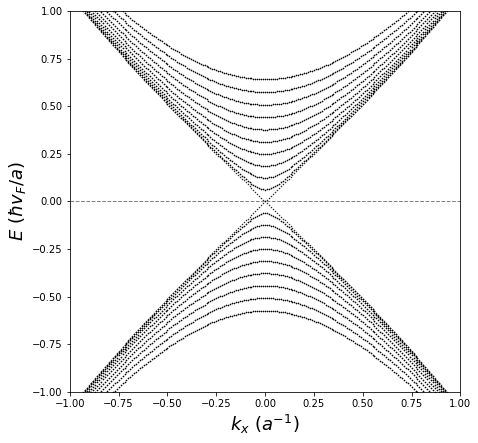

In [6]:
Nx = 1 #Assume translational invariance in x direction
Ny = 101

parameters = dict(
    Nx = Nx,
    Ny = Ny,
    B1 = 0, # no magnetic field
    N1 = 0, #
    d1 = 0, # These are irrelevant for B1 = 0
    N2 = 0, #
    potential = lambda x,y:0.0*np.random.rand(Ny,Nx),
    mass = lambda x,y:0*x,
    ky = 0,
    disorder = 0
)

bands = tf.make_bands_x(parameters, kmin = -1, kmax = 1, number_of_points = 201,number_of_bands = int(40), plot_bands = False)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)

for band in range(40):
    ax.scatter(np.linspace(-1,1,201),bands[:,band], c = 'k',s = 0.2)

ax.set_xlabel(r'$k_x$ ($a^{-1}$)', fontsize = 18)
ax.set_ylabel(r'$E$ ($\hbar v_F/a$)', fontsize = 18)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.axhline(0,ls = '--', c = 'gray', lw = 1)

We can also calculate bands in a system with (disordered) magnetic field

In [7]:
Nx = 1
Ny = 401
parameters = dict(
    Nx = Nx,
    Ny = Ny,
    B1 = pi/101, # no magnetic field
    N1 = 101, #
    d1 = 101, # These are irrelevant for B1 = 0
    N2 = 101, #
    potential = lambda x,y:0*np.random.rand(Ny,Nx),
    mass = lambda x,y:0*x,
    ky = 0,
    disorder = pi/101
)

bands = tf.make_bands_x(parameters, number_of_points = 401, plot_bands = False)

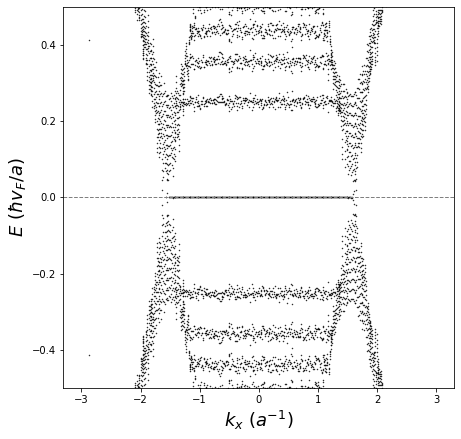

In [8]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)

for band in range(20):
    ax.scatter(np.linspace(-3,3,401), bands[:,band], c = 'k',s = 0.2)

ax.set_xlabel(r'$k_x$ ($a^{-1}$)', fontsize = 18)
ax.set_ylabel(r'$E$ ($\hbar v_F/a$)', fontsize = 18)
ax.set_ylim(-0.5,0.5)
ax.axhline(0,ls = '--', c = 'gray', lw = 1)